# Ages, Distances and Angles

### Dhiraj Kumar Hazra, IMSc, Chennai

We will be discussing codes to compute the following quantities

* Solutions to Friedmann equations
* Rate of expansion of the Universe
* Age of the Universe today
* Age at a particular redshift
* Comoving radial distance
* Angular diameter distance 
* Luminosity Distance
* Acceleration of the Universe

### References

* Cosmology, Steven Weinberg
* Theoretical Astrophysics, Vol III, T. Padmanabhan
* Wayne Hu's UChicago lecture notes


**This notebook assumes flat Universe. You need to change some formulae in order to use spatial curvature**

In [2]:
import numpy as np

### FLRW metric

$$ds^2=c^2 dt^2-a^2(t)\left[\frac{dr^2}{1-Kr^2}+r^2\left(d\theta^2+sin^2\theta d\phi^2\right)\right]$$

The quantity $K$ can be +1, 0 and -1 depending on the spatial curvature of the Universe. _Need to be careful about the units_ 

In [3]:
from astropy.cosmology import Planck15 as cosmo
import matplotlib.pyplot as plt
from matplotlib import rc
from scipy import integrate 
plt.rcParams.update({'font.size': 22})
rc('text', usetex=True)

**Constants** 

We will need constants such as speed of light and unit conversion factors etc. I have stored them in constants.py file

**Planck**

While we will constrain the cosmological parameters using observations in the upcoming lectures, to calculate cosmological quantities based on a baseline cosmology and the baseline parameter values, we need the best fit/mean values of the parameters. Here in Planckbf.py I have noted down the Planck 2018 baseline bestfits. 


In [4]:
import constants as const 
import Planckbf as Pl

## Friedmann Equations

1. $$H^2=\left(\frac{\dot a}{a}\right)^2=\frac{8\pi G}{3}\rho - \frac{Kc^2}{a^2}$$

2. $$\dot{H}+H^2=\left(\frac{\ddot a}{a}\right)=-\frac{4\pi G}{3}\left(\rho+\frac{3p}{c^2}\right)$$

## Age of the Universe

Age of the Universe can be calculated by integrating $\frac{dt}{da}$ from $a=0$ to $a=1$ (today). In this lecture we will only talk about cosmological constant as the dark energy. Therefore a general equation of state is not required and we will work with $w=-1$. **Note that these codes will have to be non-trivially modified to incorporate time dependent equation of state of dark energy**

#### Defining dt/da

$$h(z)=\frac{H(z)}{H_0}=\left[\frac{\Omega_{\rm r}}{a^4}+\frac{\Omega_{\rm m}}{a^3}+\frac{\Omega_{\rm k}}{a^2}+\Omega_{\Lambda}\right]^{1/2}$$


$$t=\int^{a}_{0}\frac{a' da'}{H_0\left[\Omega_{\rm r}+\Omega_{\rm m} a' +\Omega_{\rm k}{a'^2}+\Omega_{\Lambda}a'^4\right]^{1/2}}$$

In [5]:
def dt_da_LCDM(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    da_dt=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)
    dt_da=a/da_dt
    return dt_da

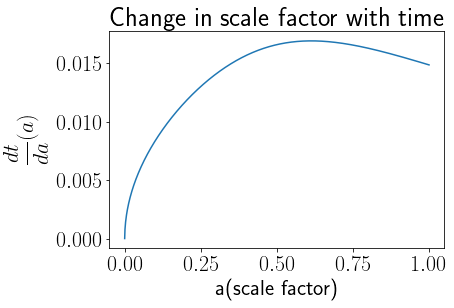

In [6]:
# show the evolution of scale factor
Om_m=Pl.Omega_mB
Om_l=Pl.Omega_lB
Om_r=Pl.Omega_rB
H0=Pl.H0B


# Prepare the data
a = np.linspace(0, 1, 1000)
plt.plot(a,dt_da_LCDM(a,Om_m,Om_l,Om_r,H0))
plt.xlabel("a(scale factor)")
plt.ylabel(r"$$\frac{dt}{da}(a)$$")
plt.title('Change in scale factor with time')
plt.show()

### Dependence on the $\Omega_{\rm m}$

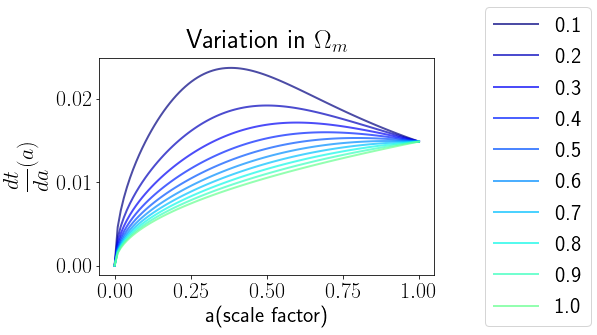

In [7]:
a = np.linspace(0, 1, 100)
Num_Steps=10
Om_m=np.linspace(0.1, 1, Num_Steps)
Om_k=np.zeros(Num_Steps)
Om_r=np.full(Num_Steps,Pl.Omega_rB)
Om_l=1-Om_m-Om_r-Om_k

n = 20
colors = plt.cm.jet(np.linspace(0,1,n))


for i in range(Num_Steps):
    plt.plot(a,dt_da_LCDM(a,Om_m[i],Om_l[i],Om_r[i],H0)
    ,alpha=0.7,linewidth=2,color=colors[i],label=f'{Om_m[i]:.1f}')   
plt.xlabel("a(scale factor)")
plt.ylabel(r"$$\frac{dt}{da}(a)$$")
plt.legend(bbox_to_anchor=(1.5, 0.5),loc='center right')
plt.title('Variation in $\Omega_{m}$')
plt.show()    

In [8]:
def dt_da_LCDM_integrand(x):
    # show the evolution of scale factor
    Om_m=Pl.Omega_mB
    Om_l=Pl.Omega_lB
    Om_r=Pl.Omega_rB
    #Omega-r must have non-zero value to integrate from a=0
    #Pl.Omega_rB
    H0=Pl.H0B
    dt_da_LCDM_integrand=dt_da_LCDM(x,Om_m,Om_l,Om_r,H0)
    return dt_da_LCDM_integrand

def Age_Universe(a,Omm,Oml,Omr,H0):
    Om_m=Omm
    Om_l=Oml
    Om_r=Omr
    H0=H0
    Age_Universe= integrate.romberg(dt_da_LCDM,0,a,
                                    args=(Om_m,Om_l,Om_r,H0),
                                    rtol=1e-3)*const.MPc/const.Km/const.Gyr
    return Age_Universe

### Integrate to get the age of the Universe

In [9]:
Age= integrate.romberg(dt_da_LCDM_integrand,0,1
                       ,rtol=1e-3)*const.MPc/const.Km/const.Gyr
print("Age of the Universe today is:", f'{Age:.2f}','Gigayears')

Age of the Universe today is: 13.79 Gigayears


## Assignments

1. Reproduce the results discussed in the lecture in any programming language you are comfortable with.
2. Obtain the age of the Universe when the scale factor was $a=\frac{1}{1100+1}$
3. Obtain the age of the Universe as a function of the scale factor
4. If curvature density changes, how does the age change

### Defining redshifts

In [10]:
# Concept of Redshift
def az(z):
    az=1.0/(1+z)
    return az

def Age_Redshift(z,Omm,Oml,Omr,H0):
    a=az(z)
    Age_Redshift=Age_Universe(a,Omm,Oml,Omr,H0)
    return Age_Redshift

### Age at matter dominated epoch and till the last scattering surface

In [11]:
a=0.5
Omm=Pl.Omega_mB
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB
H0=Pl.H0B
Age=Age_Universe(a,Omm,Oml,Omr,H0)
print("Age of the Universe at scale factor",a,'was',f'{Age:.2f}','Gigayears')

z=1100
Age=Age_Redshift(z,Omm,Oml,Omr,H0)*1e9
print("Age of the Universe at redshift",z,'was',f'{Age:.2f}','years')

Age of the Universe at scale factor 0.5 was 5.84 Gigayears
Age of the Universe at redshift 1100 was 396682.11 years


## Horizon
### Proper distances

Distance between two events in a reference frane where they occur at the same time, $dt=0$. We also just refer to the radial distances:

Defining 

$$s(t)=\int^{s}ds'=a(t)\int^r_0\frac{dr'}{(1-Kr'^2)^{1/2}}$$

for a flat Universe $s(t)=a(t) r$, using:

$$\int\frac{c dt}{a(t)}=\int\frac{dr'}{(1-Kr'^2)^{1/2}}$$

$$d\eta=\int^{a}_0\frac{c da'}{a'^2H(a)}$$


For curved Universe, this relation will change to:

$$r_{Horizon}=f\left(\int^t_0\frac{c dt}{a(t)}\right)$$, 

where this function, for $K=1$, $f(x)=\sin(x)$; for $K=0$, $f(x)=x$ and for $K=-1$, $f(x)=\sinh(x)$. 

Comoving horizon is just without the scale factor. _Today_ comoving and proper horizon are the same.


In [12]:
def deta(a,Om_m,Om_l,Om_r,H0):
    Om_k=1-Om_m-Om_l-Om_r
    asquareH=H0*np.sqrt((Om_m*a)+Om_r+(Om_k*a**2)+Om_l*a**4)
    deta=const.CKm/asquareH
    return deta

def eta(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    eta=integrate.romberg(deta,0,a,args=(Om_m,Om_l,Om_r,H0),rtol=1e-2)    
    return eta    


Omm=Pl.Omega_mB
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB
H0=Pl.H0B

aa=1
Horizon=eta(aa,Omm,Oml,Omr,H0)/1000.0
#converted to gigaparsecs
print("Horizon:",f'{Horizon:.2f}','Gpc')

Horizon: 14.24 Gpc


#### Horizon at redshift 1100
Calculates the reach of the light rays from the Big Bang to the CMB:

In [13]:
zCMB=1100
aCMB=az(zCMB)
Horizon=eta(aCMB,Omm,Oml,Omr,H0)*1000.0
#converted to kiloparsecs
print("Comoving Horizon at redshift:",z,"is",f'{Horizon:.2f}','Kpc')

Proper_Horizon=Horizon*aCMB
print("Proper Horizon at redshift:",z,"is",f'{Proper_Horizon:.2f}','Kpc')

Comoving Horizon at redshift: 1100 is 312934.10 Kpc
Proper Horizon at redshift: 1100 is 284.23 Kpc


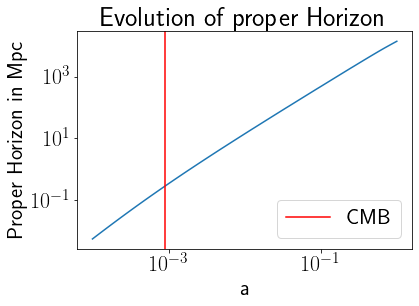

In [14]:
a = np.logspace(-4, 0, 100)
# Today comoving and proper horizon are same as a=1
Proper_Horizon=np.zeros(len(a))
for i in range(len(a)):
    Proper_Horizon[i]=a[i]*eta(a[i],Omm,Oml,Omr,H0)
    
plt.loglog(a,Proper_Horizon)
plt.xlabel("a")
plt.ylabel("Proper Horizon in Mpc")
plt.title('Evolution of proper Horizon')
plt.axvline(aCMB, 0, 1, label='CMB',color='red')
plt.legend()
plt.show()

## Distances

### Comoving distance

As mentioned before the comoving distance is given by,

$$d_C(z)=f\left(\int^{t(z)}_0\frac{c dt}{a(t)}\right)$$
 
we define integral for flat case for now. However, it is trivial to change the integral to a $\sin$ or $\sinh$ function. **Check the definition in the notes or Weinberg Cosmology for exact formulae for distances in space with spacial curvature**

In [29]:
def Comov_Distance(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    Comov_Distance=integrate.romberg(deta,a,1,args=(Om_m,Om_l,Om_r,H0)
    ,rtol=1e-2)    
    return Comov_Distance    

### Angular diameter distance

Defined as (flat Universe):

$$d_A(z)=a(z)d_C(z)$$

In [30]:
def Ang_Diam_Distance(a,Om_m,Om_l,Om_r,H0):
    #In Mpc
    Ang_Diam_Distance=a*Comov_Distance(a,Om_m,Om_l,Om_r,H0)
    return Ang_Diam_Distance    

### Luminsity distance

Defined as:

$$d_L(z)=d_C(z)/a(z)=d_A(z)/a^2(z)$$

In [35]:
def Lum_Distance(a,Om_m,Om_l,Om_r,H0):    
    Lum_Distance=Ang_Diam_Distance(a,Om_m,Om_l,Om_r,H0)/a**2
    return Lum_Distance    

atoday=0.1
print(Lum_Distance(atoday,Omm,Oml,Omr,H0))

94099.11170643837


## Horizon problem
### Angle subtended on the sky

$$\theta=\frac{\mathrm{Horizon}}{\mathrm{Angular~diameter~distance}}$$

In [22]:
def Theta_Horizon(a,Om_m,Om_l,Om_r,H0):
    #in degrees
    Theta_Horizon=a*eta(a,Om_m,Om_l,Om_r,H0)\
    /Ang_Diam_Distance(a,Om_m,Om_l,Om_r,H0)
    Theta_Horizon=np.degrees(Theta_Horizon)
    return Theta_Horizon


print('The angle subtended from today to the CMB horizon on the CMB sky')
print(Theta_Horizon(aCMB,Omm,Oml,Omr,H0))

The angle subtended from today to the CMB horizon on the CMB sky
1.287911349725855


### Comoving transverse distance

Integrate $d\eta$ between $z_1$ and $z_2$

In [23]:
def Comov_Trans_Distance(a1,a2,Om_m,Om_l,Om_r,H0):
    #In Mpc
    Comov_Trans_Distance=integrate.romberg(deta,a1,a2
                                           ,args=(Om_m,Om_l,Om_r,H0),rtol=1e-2) 
    Comov_Trans_Distance=abs(Comov_Trans_Distance)
    unit="MPc"
    return Comov_Trans_Distance, unit    

In [24]:
z1=0.5
z2=1.0

a1=az(z1)
a2=az(z2)
Dc=Comov_Trans_Distance(a1,a2,Omm,Oml,Omr,H0)
print('Comoving Transverse Distance between redshifts',z1
      ,'and',z2,'is:',f'{Dc[0]:.2f}',Dc[1])

Comoving Transverse Distance between redshifts 0.5 and 1.0 is: 1450.23 MPc


### Plotting all three distance measures together

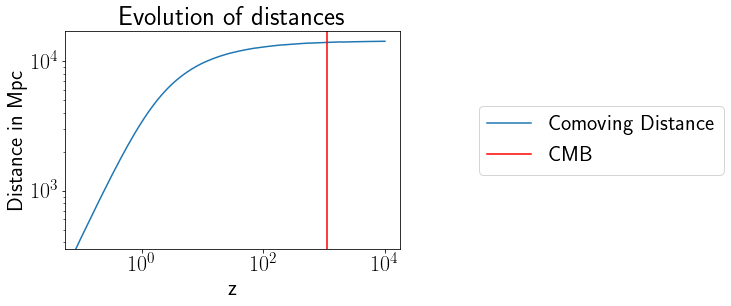

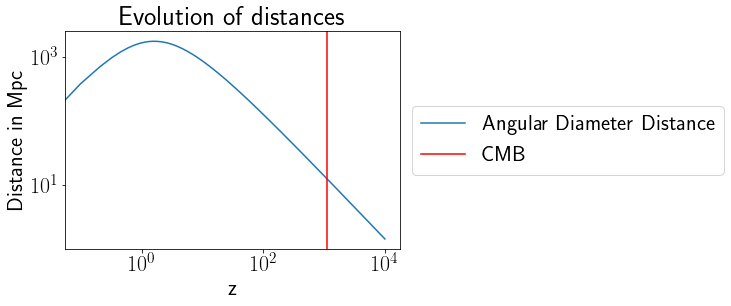

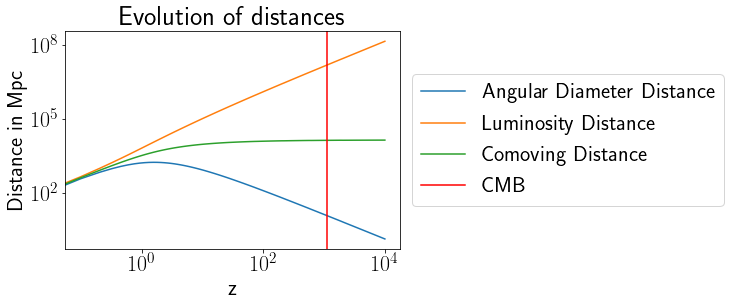

In [25]:
a = np.logspace(-4, 0, 100)
dA= np.zeros(len(a))
dL= np.zeros(len(a))
dR= np.zeros(len(a))
for i in range(len(a)):
    dA[i]=Ang_Diam_Distance(a[i],Omm,Oml,Omr,H0)
    dL[i]=Lum_Distance(a[i],Omm,Oml,Omr,H0)
    dR[i]=Comov_Distance(a[i],Omm,Oml,Omr,H0)
    
plt.loglog(1/a-1,dR,label='Comoving Distance')
plt.xlabel("z")
plt.ylabel("Distance in Mpc")
plt.title('Evolution of distances')
plt.axvline(1/aCMB-1, 0, 1,color='red',label='CMB')
plt.legend(bbox_to_anchor=(2, 0.5),loc='center right')
plt.show()
plt.loglog(1/a-1,dA,label='Angular Diameter Distance')
plt.xlabel("z")
plt.ylabel("Distance in Mpc")
plt.title('Evolution of distances')
plt.axvline(1/aCMB-1, 0, 1,color='red',label='CMB')
plt.legend(bbox_to_anchor=(2, 0.5),loc='center right')
plt.show()
plt.loglog(1/a-1,dA,label='Angular Diameter Distance')
plt.loglog(1/a-1,dL,label='Luminosity Distance')
plt.loglog(1/a-1,dR,label='Comoving Distance')
plt.xlabel("z")
plt.ylabel("Distance in Mpc")
plt.title('Evolution of distances')
plt.axvline(1/aCMB-1, 0, 1,color='red',label='CMB')
plt.legend(bbox_to_anchor=(2, 0.5),loc='center right')
plt.show()

## Assignments

1. Reproduce all of the above in any language

2. Get angular diameter distance variation as a function of $\Omega_m$

3. Obtain the distances in open and closed Universe

4. With variable curvature density, ranging from -0.05 to +0.05, plot the 3 distances as a function of redshift

5. Calculate the horizon for a Universe without dark energy 

6. Calculate the horizon for a Universe without matter

7. Calculate the deceleration of the Universe given baseline cosmology with Planck best fits ($q=-1-\frac{\dot H}{H^2}$)


### Deceleration parameter

In [49]:
def h_a(a,Om_m,Om_l,Om_r):
    #this is simply h(z)=H(z)/H_0
    Om_k=1-Om_m-Om_l-Om_r
    h_a=np.sqrt((Om_m/a**3.0)+Om_l+(Om_r/a**4.0)+(Om_k/a**2.0))
    return h_a

def dh_da(a,Om_m,Om_l,Om_r):
    #this is simply dh(z)/da
    Om_k=1-Om_m-Om_l-Om_r
    dh_da=0.5/h_a(a,Om_m,Om_l,Om_r)
    dh_da=dh_da*(-(3.0*Om_m/a**4.0)-(4.0*Om_r/a**5.0)-(2.0*Om_k/a**3.0))    
    return dh_da

def q(a,Om_m,Om_l,Om_r):
    #deceleration parameter
    q=-1.0-a*dh_da(a,Om_m,Om_l,Om_r)/h_a(a,Om_m,Om_l,Om_r)
    return q

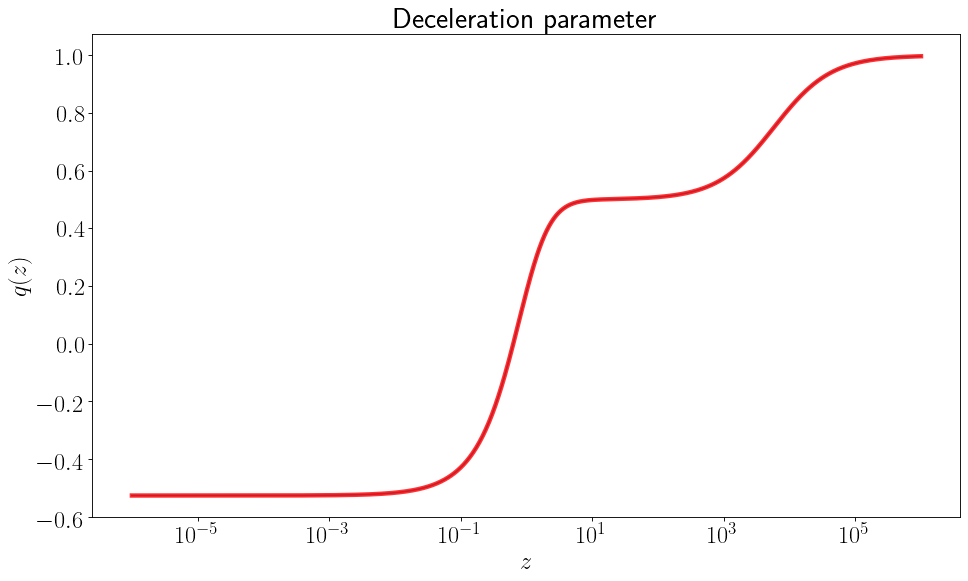

In [50]:
z=np.logspace(-6,6,1000)
a=np.zeros(len(z))
a=az(z)

Omm=Pl.Omega_mB
Oml=Pl.Omega_lB
Omr=Pl.Omega_rB

# plotting deceleration parameter
plt.figure(num=None, figsize=(14, 8), dpi=80, facecolor='w', edgecolor='k')
plt.plot(z,q(a,Omm,Oml,Omr))
plt.xscale('log')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.xlabel('$z$')
plt.ylabel('$q(z)$')
plt.title('Deceleration parameter')
plt.plot(z, q(a,Omm,Oml,Omr), color="r", lw=4, alpha=0.8)

plt.savefig("Union-2.1-qz-samples.png")